<a href="https://colab.research.google.com/github/Leelddd/deep-tragedy/blob/master/dlwp/3_4_classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.4 Classifying movie reviews: a binary classification example

## 3.4.1 Loading the IMDB dataset

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
!pip install numpy==1.16.2

In [0]:
# Downgrate numpy to 1.16.2 to fix a problem
# !pip install numpy==1.16.2
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
train_data[0][:10], train_labels[0]

([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65], 1)

In [0]:
word_index = imdb.get_word_index()

In [8]:
[str(key)+':'+str(value) for (_, (key,value)) in zip(range(10), word_index.items())]

['fawn:34701',
 'tsukino:52006',
 'nunnery:52007',
 'sonja:16816',
 'vani:63951',
 'woods:1408',
 'spiders:16115',
 'hanging:2345',
 'woody:2289',
 'trawling:52008']

In [0]:
reverse_word_index = {value:key for key,value in word_index.items()}
decoded_review = ' '.join(reverse_word_index.get(i-3, '?') for i in train_data[0])

In [12]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 3.4.2 Encoding the integer sequences into a binary matrix

In [0]:
import numpy as np

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [26]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

## 3.4.3 The model definition

the model definition

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

compiling the model

In [0]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

configuraing the optimizer

In [0]:
from keras import optimizers

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

using custom losses and metrics

In [0]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

## 3.4.4 Validating your approach

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [30]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.5341 - acc: 0.7893 - val_loss: 0.4081 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.3270 - acc: 0.8985 - val_loss: 0.3159 - val_acc: 0.8843
Epoch 3/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.2363 - acc: 0.9241 - val_loss: 0.2831 - val_acc: 0.8897
Epoch 4/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1872 - acc: 0.9386 - val_loss: 0.2866 - val_acc: 0.8842
Epoch 5/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1507 - acc: 0.9519 - val_loss: 0.2767 - val_acc: 0.8886
Epoch 6/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1262 - acc: 0.9616 - val_loss: 0.3133 - val_acc: 0.8795
Epoch 7/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1051 - acc: 0.9684 - val_loss: 0.3115 - 

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)


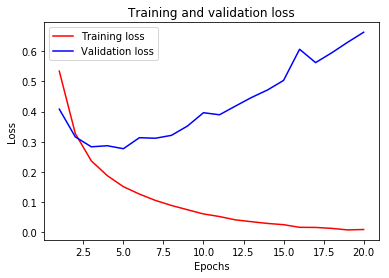

In [32]:
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

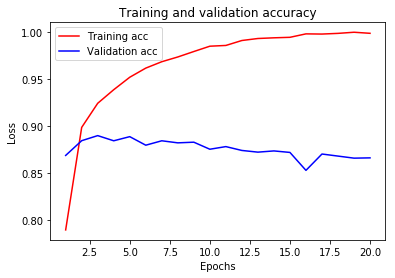

In [33]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [34]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s 132us/step - loss: 0.4632 - acc: 0.8176
Epoch 2/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.2641 - acc: 0.9061
Epoch 3/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.2029 - acc: 0.9276
Epoch 4/4
25000/25000 [==============================] - 2s 73us/step


[0.29190899978637697, 0.885]

In [35]:
model.predict(x_test)

array([[0.21787608],
       [0.99979347],
       [0.9406823 ],
       ...,
       [0.1316728 ],
       [0.05932778],
       [0.6830929 ]], dtype=float32)